In [1]:
import numpy as np

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')

from MR_env import MR_env
from DMR_env import DMR_env
from DDQN import DDQN

#%%
env = MR_env(S_0=1, kappa=1, sigma=0.2, theta=1,
             dt=0.25, T = int(20), 
             I_max=10, lambd=0.05)
denv = DMR_env(S_0=1, kappa=1, sigma=0.2, theta_a=0.5, theta_b=1.5,
                dt=0.25, T = int(20), 
                I_max=10, lambd=0.05)

#%%
ddqn = DDQN(denv, I_max = 10,
            gamma = 0.999, 
            lr=1e-3,
            name="test" )
 
# #%%    
# ddqn.train(n_iter=10000, n_plot=200, n_iter_Q=5)

In [3]:
n_paths = 10
def plot(t, x, plt_i, title):
        # print(x.shape)
        # pdb.set_trace()

        qtl = np.quantile(x, [0.05, 0.5, 0.95], axis=0)
        # print(qtl.shape)

        plt.subplot(2, 2, plt_i)

        plt.fill_between(t, qtl[0, :], qtl[2, :], alpha=0.5)
        plt.plot(t, qtl[1, :], color="k", linewidth=1)
        plt.plot(t, x[:n_paths, :].T, linewidth=1)

        # plt.xticks([0,0.5,1])
        plt.title(title)
        plt.xlabel(r"$t$")

# MR Env

## $dS_t = \kappa ( \theta - S_t) dt + \sigma dW_t$

## $\kappa$ - the strength that push towards $\theta$

Training with kappa = 0.5
0.5 2 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 21124.67it/s]


Training with kappa = 1
1 2 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 14254.82it/s]


Training with kappa = 1.5
1.5 2 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 23495.86it/s]


Training with kappa = 2
2 2 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 23958.89it/s]


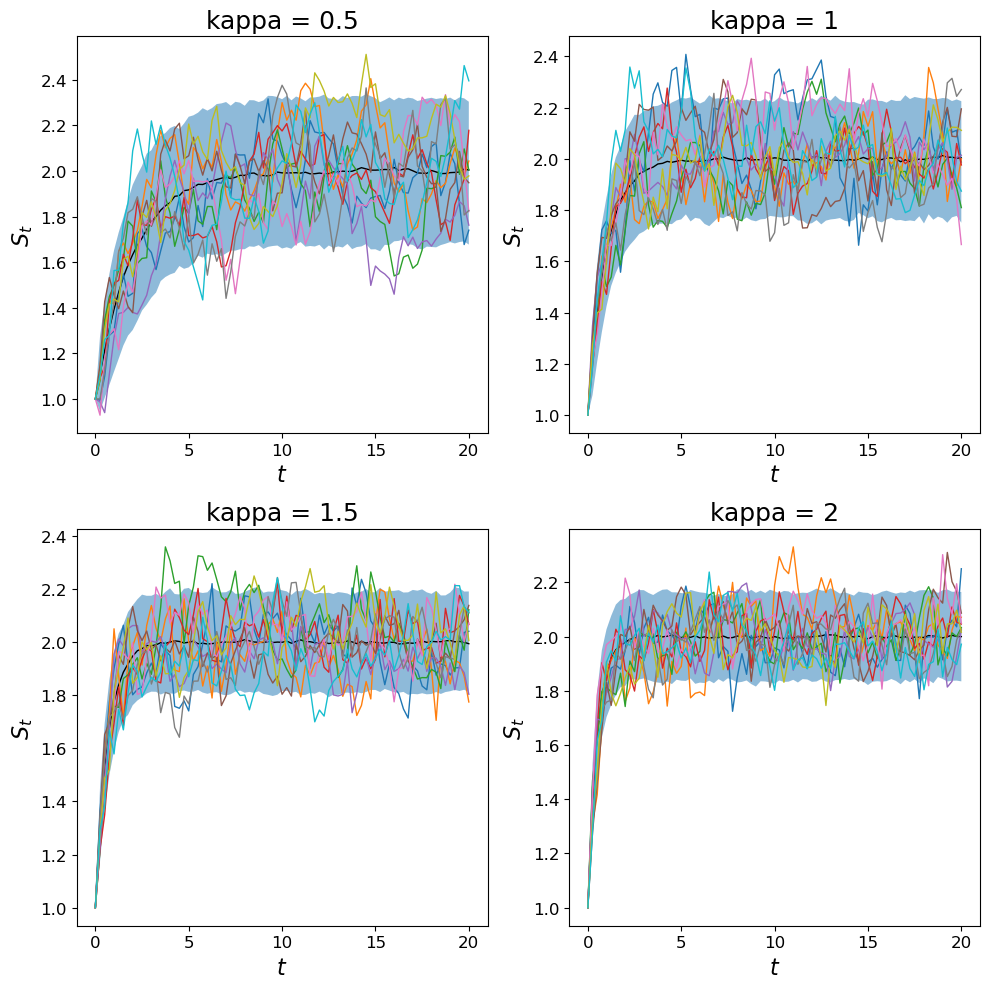

In [4]:
kappa_list = [0.5, 1, 1.5, 2]

S_path = []
for kappa in kappa_list:
    print(f"Training with kappa = {kappa}")
    env = MR_env(S_0=1, kappa=kappa, sigma=0.2, theta=2,
             dt=0.25, T = int(20), 
             I_max=10, lambd=0.05)
    S, I = env.Simulate(mini_batch_size=1000)
    S_path.append(S)
t = env.t
plt.figure(figsize=(10, 10))
for i, S in enumerate(S_path):
    plot(t, S, i+1, f"kappa = {kappa_list[i]}")
    plt.title(f"kappa = {kappa_list[i]}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_t$")
plt.tight_layout()
plt.show()
# it shows that the more kappa, the faster the price converges to the mean reversion level


## $\sigma$ - the volatility of the price

Training with sigma = 0.1
1 1 0.1 0.05


100%|██████████| 80/80 [00:00<00:00, 14346.24it/s]


Training with sigma = 0.3
1 1 0.3 0.05


100%|██████████| 80/80 [00:00<00:00, 24458.37it/s]


Training with sigma = 0.5
1 1 0.5 0.05


100%|██████████| 80/80 [00:00<00:00, 21720.89it/s]


Training with sigma = 0.7
1 1 0.7 0.05


100%|██████████| 80/80 [00:00<00:00, 22741.06it/s]


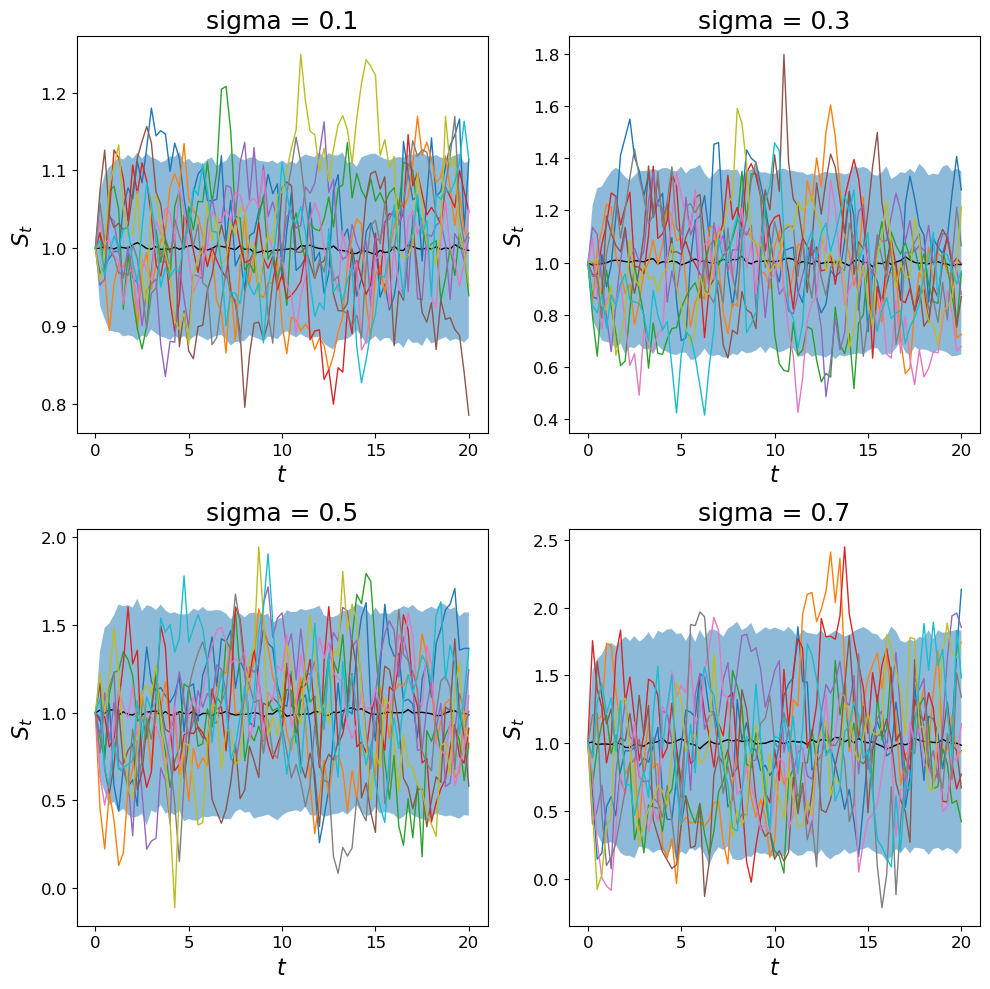

In [5]:
sigma_list = [0.1, 0.3, 0.5, 0.7]
S_path = []
for sigma in sigma_list:
    print(f"Training with sigma = {sigma}")
    env = MR_env(S_0=1, kappa=1, sigma=sigma, theta=1,
             dt=0.25, T = int(20), 
             I_max=10, lambd=0.05)
    S, I = env.Simulate(mini_batch_size=1000)
    S_path.append(S)
t = env.t
plt.figure(figsize=(10, 10))
for i, S in enumerate(S_path):
    plot(t, S, i+1, f"sigma = {sigma_list[i]}")
    plt.title(f"sigma = {sigma_list[i]}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_t$")
plt.tight_layout()
plt.show()

## $\theta$ - the mean revert level

Training with theta = 0.5
1 0.5 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 8911.49it/s]


Training with theta = 1
1 1 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 15686.24it/s]


Training with theta = 1.5
1 1.5 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 16470.86it/s]


Training with theta = 2
1 2 0.2 0.05


100%|██████████| 80/80 [00:00<00:00, 20070.84it/s]


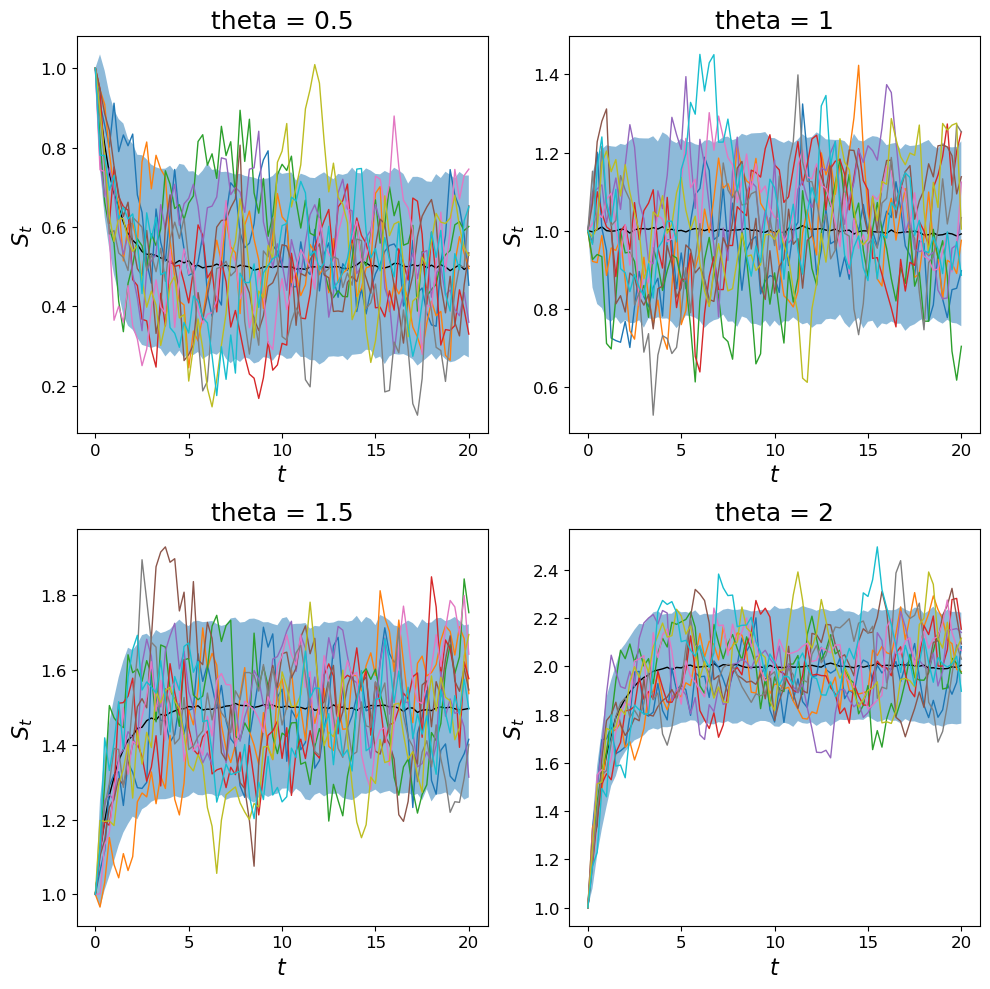

In [6]:
theta_list = [0.5, 1, 1.5, 2]
S_path = []
for theta in theta_list:
    print(f"Training with theta = {theta}")
    env = MR_env(S_0=1, kappa=1, sigma=0.2, theta=theta,
             dt=0.25, T = int(20), 
             I_max=10, lambd=0.05)
    S, I = env.Simulate(mini_batch_size=1000)
    S_path.append(S)
t = env.t
plt.figure(figsize=(10, 10))
for i, S in enumerate(S_path):
    plot(t, S, i+1, f"theta = {theta_list[i]}")
    plt.title(f"theta = {theta_list[i]}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_t$")
plt.tight_layout()
plt.show()

# DMR Env

In [15]:
n_paths = 30

## $\kappa$

Training with kappa = 0.5


100%|██████████| 80/80 [00:00<00:00, 5425.48it/s]


Training with kappa = 1


100%|██████████| 80/80 [00:00<00:00, 12685.99it/s]


Training with kappa = 1.5


100%|██████████| 80/80 [00:00<00:00, 8792.17it/s]


Training with kappa = 2


100%|██████████| 80/80 [00:00<00:00, 6983.23it/s]


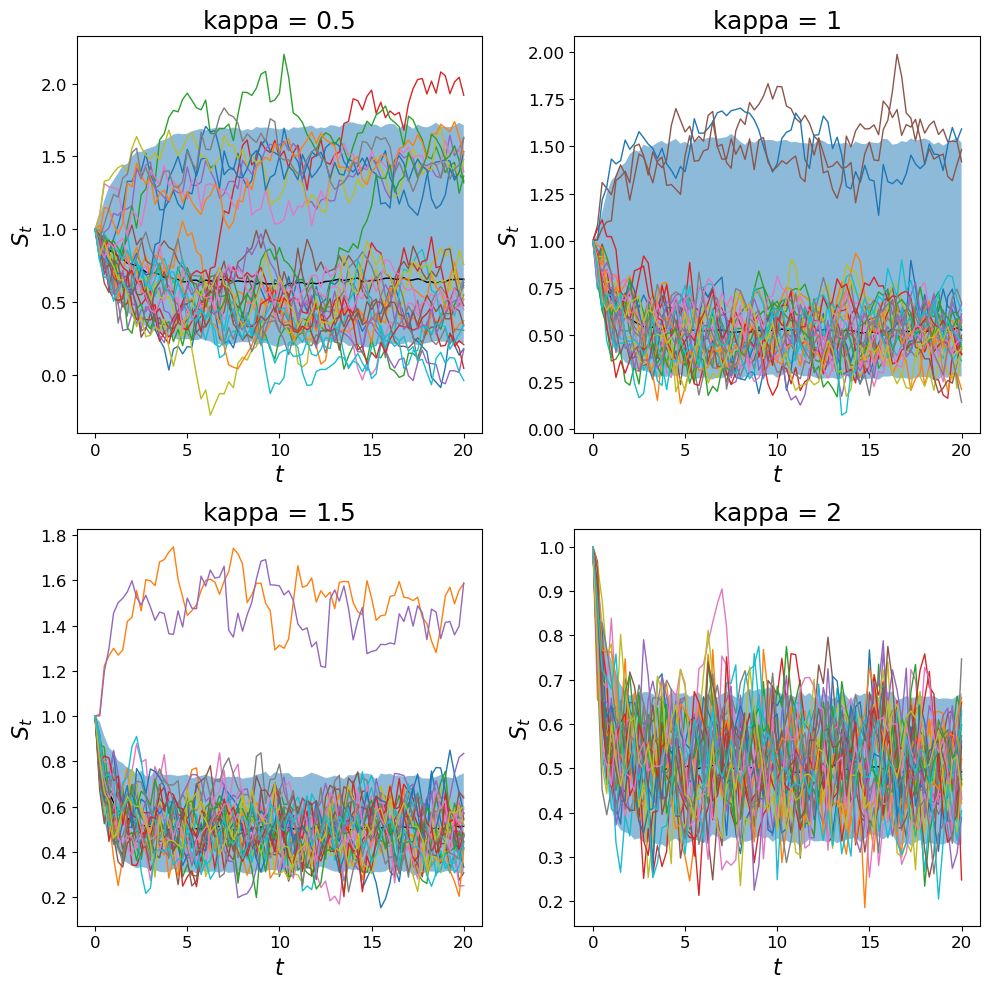

In [16]:
kappa_list = [0.5, 1, 1.5, 2]

S_path = []
for kappa in kappa_list:
    print(f"Training with kappa = {kappa}")
    env = DMR_env(S_0=1, kappa=kappa, sigma=0.2, theta_a=0.5, theta_b=1.5,
                dt=0.25, T = int(20), 
                I_max=10, lambd=0.05)
    S, I = env.Simulate(mini_batch_size=1000)
    S_path.append(S)
t = env.t
plt.figure(figsize=(10, 10))
for i, S in enumerate(S_path):
    plot(t, S, i+1, f"kappa = {kappa_list[i]}")
    plt.title(f"kappa = {kappa_list[i]}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_t$")
plt.tight_layout()
plt.show()
# it shows that the more kappa, the faster the price converges to the mean reversion level
# also move the equal to less side or greater side change the behavior a lot

## $\sigma$

Training with sigma = 0.1


100%|██████████| 80/80 [00:00<00:00, 6121.28it/s]


Training with sigma = 0.2


100%|██████████| 80/80 [00:00<00:00, 11763.17it/s]


Training with sigma = 0.3


100%|██████████| 80/80 [00:00<00:00, 9470.89it/s]


Training with sigma = 0.4


100%|██████████| 80/80 [00:00<00:00, 5631.45it/s]


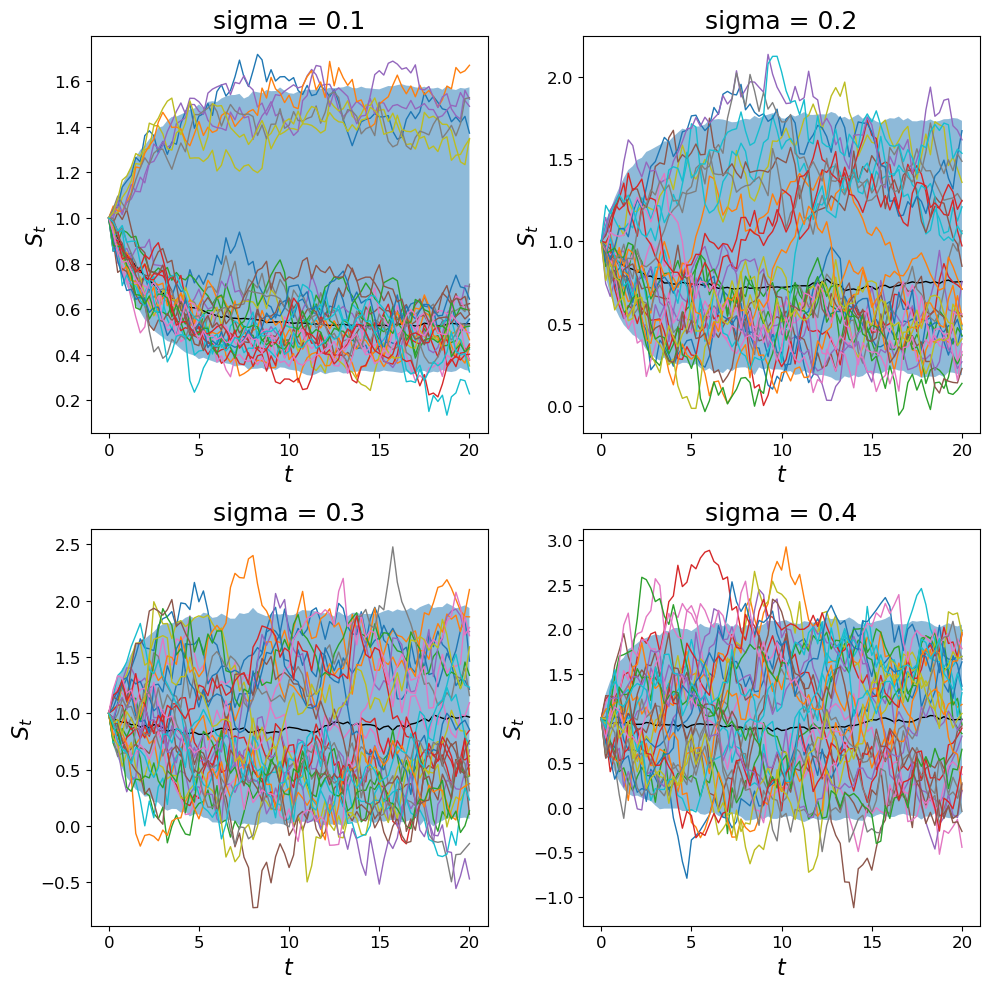

In [17]:
sigma_list = [0.1, 0.2, 0.3, 0.4]
S_path = []
for sigma in sigma_list:
    print(f"Training with sigma = {sigma}")
    env = DMR_env(S_0=1, kappa=0.4, sigma=sigma, theta_a=0.5, theta_b=1.5,
                dt=0.25, T = int(20), 
                I_max=10, lambd=0.05)
    S, I = env.Simulate(mini_batch_size=1000)
    S_path.append(S)
t = env.t
plt.figure(figsize=(10, 10))
for i, S in enumerate(S_path):
    plot(t, S, i+1, f"sigma = {sigma_list[i]}")
    plt.title(f"sigma = {sigma_list[i]}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_t$")
plt.tight_layout()
plt.show()

## $\theta_a$ & $\theta_b$ 

Training with theta = (0.2, 1.8)


100%|██████████| 80/80 [00:00<00:00, 8974.89it/s]


Training with theta = (0.5, 1.5)


100%|██████████| 80/80 [00:00<00:00, 14039.51it/s]


Training with theta = (0.8, 1.2)


100%|██████████| 80/80 [00:00<00:00, 11555.75it/s]


Training with theta = (1, 1)


100%|██████████| 80/80 [00:00<00:00, 5546.74it/s]


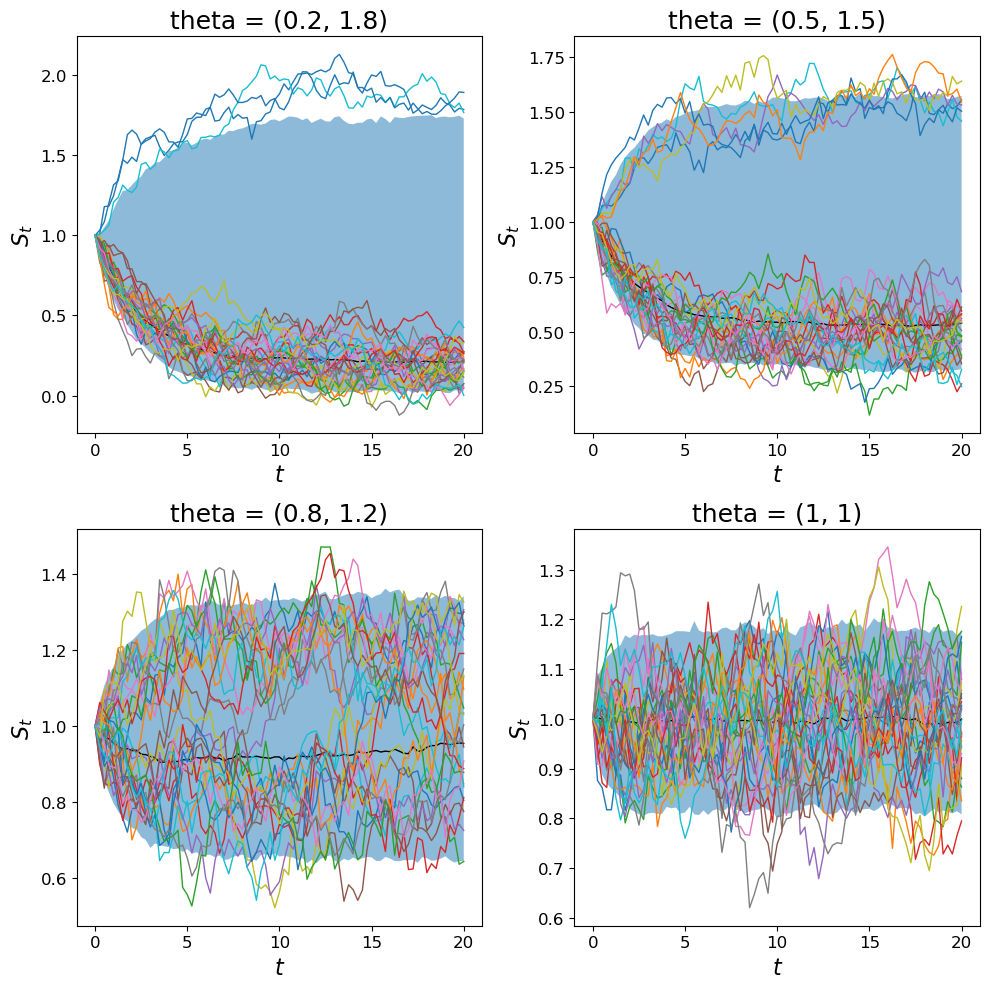

In [18]:
theta_list = [(0.2,1.8),(0.5,1.5),(0.8,1.2),(1,1)]
S_path = []
for theta in theta_list:
    print(f"Training with theta = {theta}")
    env = DMR_env(S_0=1, kappa=0.4, sigma=0.1, theta_a=theta[0], theta_b=theta[1],
                dt=0.25, T = int(20), 
                I_max=10, lambd=0.05)
    S, I = env.Simulate(mini_batch_size=1000)
    S_path.append(S)
t = env.t
plt.figure(figsize=(10, 10))
for i, S in enumerate(S_path):
    plot(t, S, i+1, f"theta = {theta_list[i]}")
    plt.title(f"theta = {theta_list[i]}")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_t$")
plt.tight_layout()
plt.show()